# Project 2: Helping realtors to predict sale prices in Ames 

Done by: Richelle-Joy Chia, data scientist and realtor at MyProperty

Problem statement: How can we help realtors effectively and efficiently predict the market value of houses in Ames, Iowa?

## Part 2: Data cleaning

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white", color_codes=True)
colors_palette = sns.color_palette("GnBu_d")
sns.set_palette(colors_palette)


In [2]:
# import datasets

train_data = pd.read_csv('./datasets/train.csv')
test_data = pd.read_csv('./datasets/test.csv')

## Fix missing values

There are a number of missing values in multiple columns. To sort out the missing values, I will split up the features into three separate categories based on the data dictionary.

1. These are the categorical variables where NA means no feature, instead of missing value: PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrType 

    Hence, I will replace NA with 'None'. 

2. These are the numerical where NA means no feature, instead of missing value: GarageArea, GarageCars, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, MasVnrArea

    Hence, I will replace NA with 0.
    
3. These are variables where NA stands for missing values: Functional, MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities, LotFrontage, GarageYrBlt

    Hence, I would replace them with either modes or mean. 

In [3]:
# imputation transformer for completing missing values
from sklearn.impute import SimpleImputer

In [4]:
# train dataset 

# category 1
cat_1 = [
    'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Type',
    'Garage Finish', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond',
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Mas Vnr Type'
]

train_data[cat_1] = train_data[cat_1].fillna("None")

# category 2
cat_2 = [
    'Garage Area', 'Garage Cars', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
    'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area'
]

train_data[cat_2] = train_data[cat_2].fillna(0)

# category 3 part 1
cat_3a = ['Functional', 'MS Zoning', 'Electrical', 'Kitchen Qual', 'Exterior 1st',
    'Exterior 2nd', 'Sale Type', 'Utilities'
]

imp = SimpleImputer(strategy='most_frequent')
train_data[cat_3a] = pd.DataFrame(imp.fit_transform(train_data[cat_3a]), index=train_data.index)
train_data[cat_3a]

# category 3 part 2


mean_lot_frontage = train_data['Lot Frontage'].mean()
mean_lot_frontage

train_data['Lot Frontage'] = train_data['Lot Frontage'].fillna(mean_lot_frontage)

train_data.GarageYrBlty = train_data['Garage Yr Blt'].fillna(train_data['Year Built'], inplace=True)


In [5]:
# check if there are still any missing values
sum(train_data.isnull().sum())

0

In [6]:
# test dataset 

# category 1
cat_1 = [
    'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Type',
    'Garage Finish', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond',
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Mas Vnr Type'
]

test_data[cat_1] = test_data[cat_1].fillna("None")

# category 2
cat_2 = [
    'Garage Area', 'Garage Cars', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
    'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area'
]

test_data[cat_2] = test_data[cat_2].fillna(0)

# category 3 part 1
cat_3a = ['Functional', 'MS Zoning', 'Electrical', 'Kitchen Qual', 'Exterior 1st',
    'Exterior 2nd', 'Sale Type', 'Utilities'
]

imp = SimpleImputer(strategy='most_frequent')
test_data[cat_3a] = pd.DataFrame(imp.fit_transform(test_data[cat_3a]), index=test_data.index)
test_data[cat_3a]


# category 3 part 2

mean_lot_frontage = test_data['Lot Frontage'].mean()
mean_lot_frontage

test_data['Lot Frontage'] = test_data['Lot Frontage'].fillna(mean_lot_frontage)


test_data.GarageYrBlt = test_data['Garage Yr Blt'].fillna(test_data['Year Built'], inplace=True)


In [7]:
# check if there are still any missing values
sum(test_data.isnull().sum())

0

### Feature engineering 
- Crete new features based on existing features in the data. The new data includes the total sq ft for the house, total number of bathrooms, age of the house, and whether the house is brand new. I believe these new features can help to reduce number of features while making sense at the same time.

In [8]:
# summing up the total sq ft for basement, 1st and 2nd floor

train_data['TotalSqFeet'] = train_data['Total Bsmt SF'] + train_data['1st Flr SF'] + train_data['2nd Flr SF']
test_data['TotalSqFeet'] = test_data['Total Bsmt SF'] + test_data['1st Flr SF'] + test_data['2nd Flr SF']

# summing up the number of bathrooms in the house 

train_data['TotalBathroom'] = train_data['Full Bath'] + train_data['Bsmt Full Bath'] + train_data['Bsmt Half Bath'] + train_data['Half Bath']
test_data['TotalBathroom'] = test_data['Full Bath'] + test_data['Bsmt Full Bath'] + test_data['Bsmt Half Bath'] + test_data['Half Bath']

# age of the house
train_data['AgeofHouse'] = train_data['Yr Sold'] - train_data['Year Built']
test_data['AgeofHouse'] = test_data['Yr Sold'] - test_data['Year Built']

# whether or not the house is yet to built (1 = new, 0= old)
train_data['isNew'] = np.where(train_data['Yr Sold'] == train_data['Year Built'], 1, 0)
test_data['isNew'] = np.where(test_data['Yr Sold'] == test_data['Year Built'], 1, 0)

In [9]:
# drop features that have been combined as well as features with multicollinearity (refer to Part 1: EDA)

train_data.drop(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Yr Sold', 'Year Built', 'Garage Yr Blt', 'Garage Cars', 'TotRms AbvGrd'], axis=1, inplace= True)
test_data.drop(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Yr Sold', 'Year Built', 'Garage Yr Blt', 'Garage Cars', 'TotRms AbvGrd'], axis=1, inplace= True)


In [10]:
# check the number of categorical columns

print("There are {} columns and {} categorial columns in the train dataset."
      .format(train_data.shape[1],
              train_data.select_dtypes([np.object]).shape[1]))


print("There are {} columns and {} categorial columns in the test dataset."
      .format(test_data.shape[1],
              test_data.select_dtypes([np.object]).shape[1]))

There are 73 columns and 42 categorial columns in the train dataset.
There are 72 columns and 42 categorial columns in the test dataset.


/var/folders/_h/y5c9n2xs6qj32b1f_mr0b0ch0000gn/T/ipykernel_6933/1773046459.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_data.select_dtypes([np.object]).shape[1]))
/var/folders/_h/y5c9n2xs6qj32b1f_mr0b0ch0000gn/T/ipykernel_6933/1773046459.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_data.select_dtypes([np.object]).shape[1]))


### Correlation matrix (II) to examine the relationship between the variables and predictor (SalePrice)

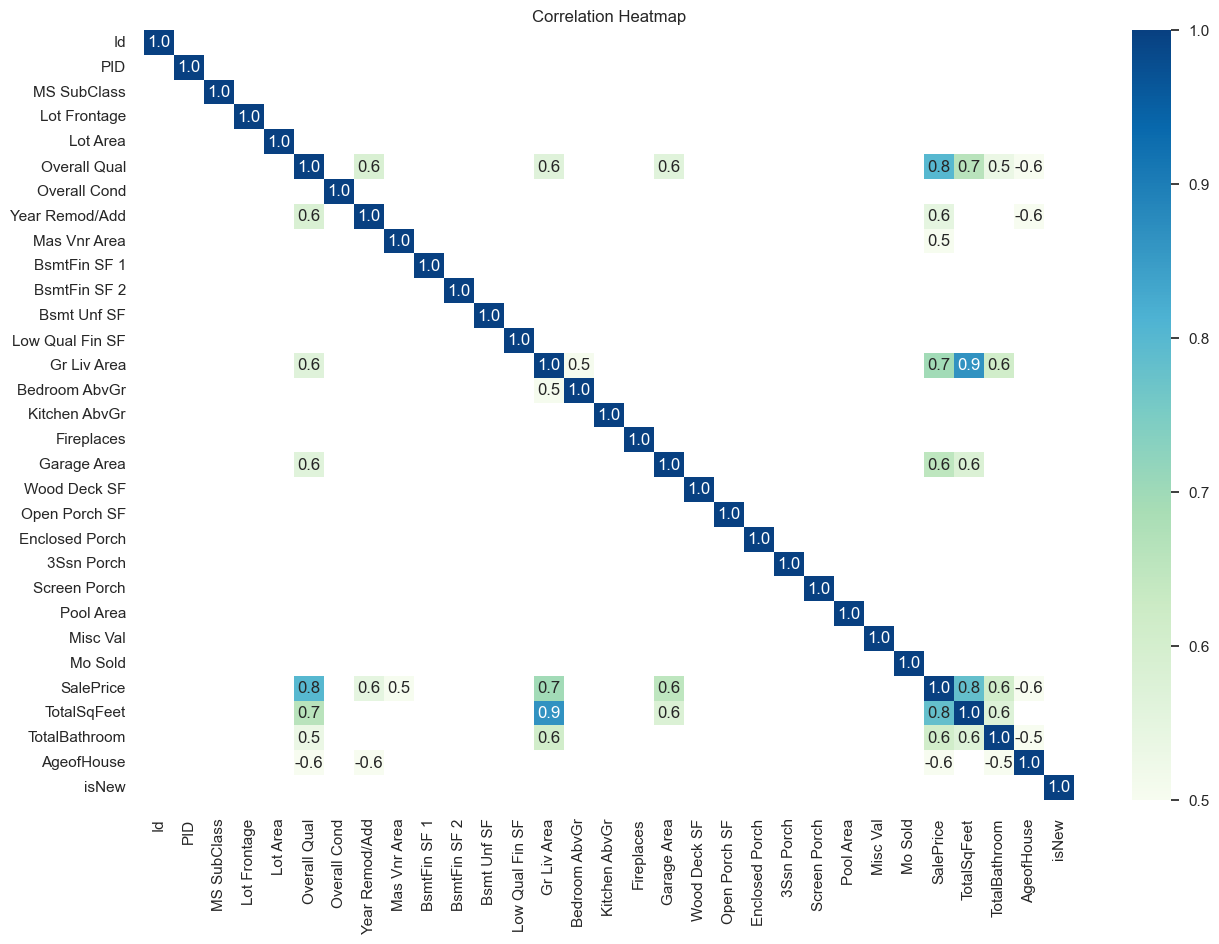

In [11]:
# correlation matrix including SalePrice 
corr_matrix = train_data.corr()

# Select correlations greater than 0.5
high_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_matrix,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

- Based on the correlation matrix between the features and SalePrice, I will be keeping the following numeric features:
Overall Qual, Year Built, Year Remod/Add, Mas Vnr Area, Gr Live Area, Garage Area, TotalSqFeet, TotalBathroom, isNew

## Descriptives

In [12]:
train_data.describe(include = 'object').transpose()

,count,unique,top,freq
MS Zoning,2051,7,RL,1598
Street,2051,2,Pave,2044
Alley,2051,3,None,1911
Lot Shape,2051,4,Reg,1295
Land Contour,2051,4,Lvl,1843
Utilities,2051,3,AllPub,2049
Lot Config,2051,5,Inside,1503
Land Slope,2051,3,Gtl,1953
Neighborhood,2051,28,NAmes,310
Condition 1,2051,9,Norm,1767


- Based on the descriptives table, I will be removing features that contain more than 80% of the same responses: Street, Alley, Land Contour, Utilities, Land Slope, Condition 1, Condition 2, Bldg Type, Roof Matl,Bsmt Cond, BsmtFin Type 2, Heating,Central Air, Electrical, Functional, Garage Qual, Garage Cond, Paved Drive, Pool QC, Fence, Misc Feature, Sale Type

In [13]:
# drop columns because these variables exceeded 80% 

train_data.drop(['Street', 'Alley', 'Land Contour', 'Utilities', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'Roof Matl', 'Bsmt Cond', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type'], axis=1, inplace= True)
test_data.drop(['Street', 'Alley', 'Land Contour', 'Utilities', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'Roof Matl', 'Bsmt Cond', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 'Functional', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type'], axis=1, inplace= True)


## Examine the boxplots on categorical columns

In [14]:
# create a separate variable to store categorical columns

train_cat = train_data.select_dtypes(include=['object'])

In [15]:
# function to plot the boxplots

def boxplot(df): 
    for n in df.columns:
        if len(df[n].unique())>= 7:
            plt.figure(figsize = (25,10))
            
            sns.boxplot(data=train_data, x=n, y="SalePrice")
            
            plt.title(f'{n} vs Saleprice');
        
        else:
            plt.figure(figsize = (8,5))
            
            sns.boxplot(data=train_data, x=n, y="SalePrice")
            
            plt.title(f'{n} vs Saleprice');

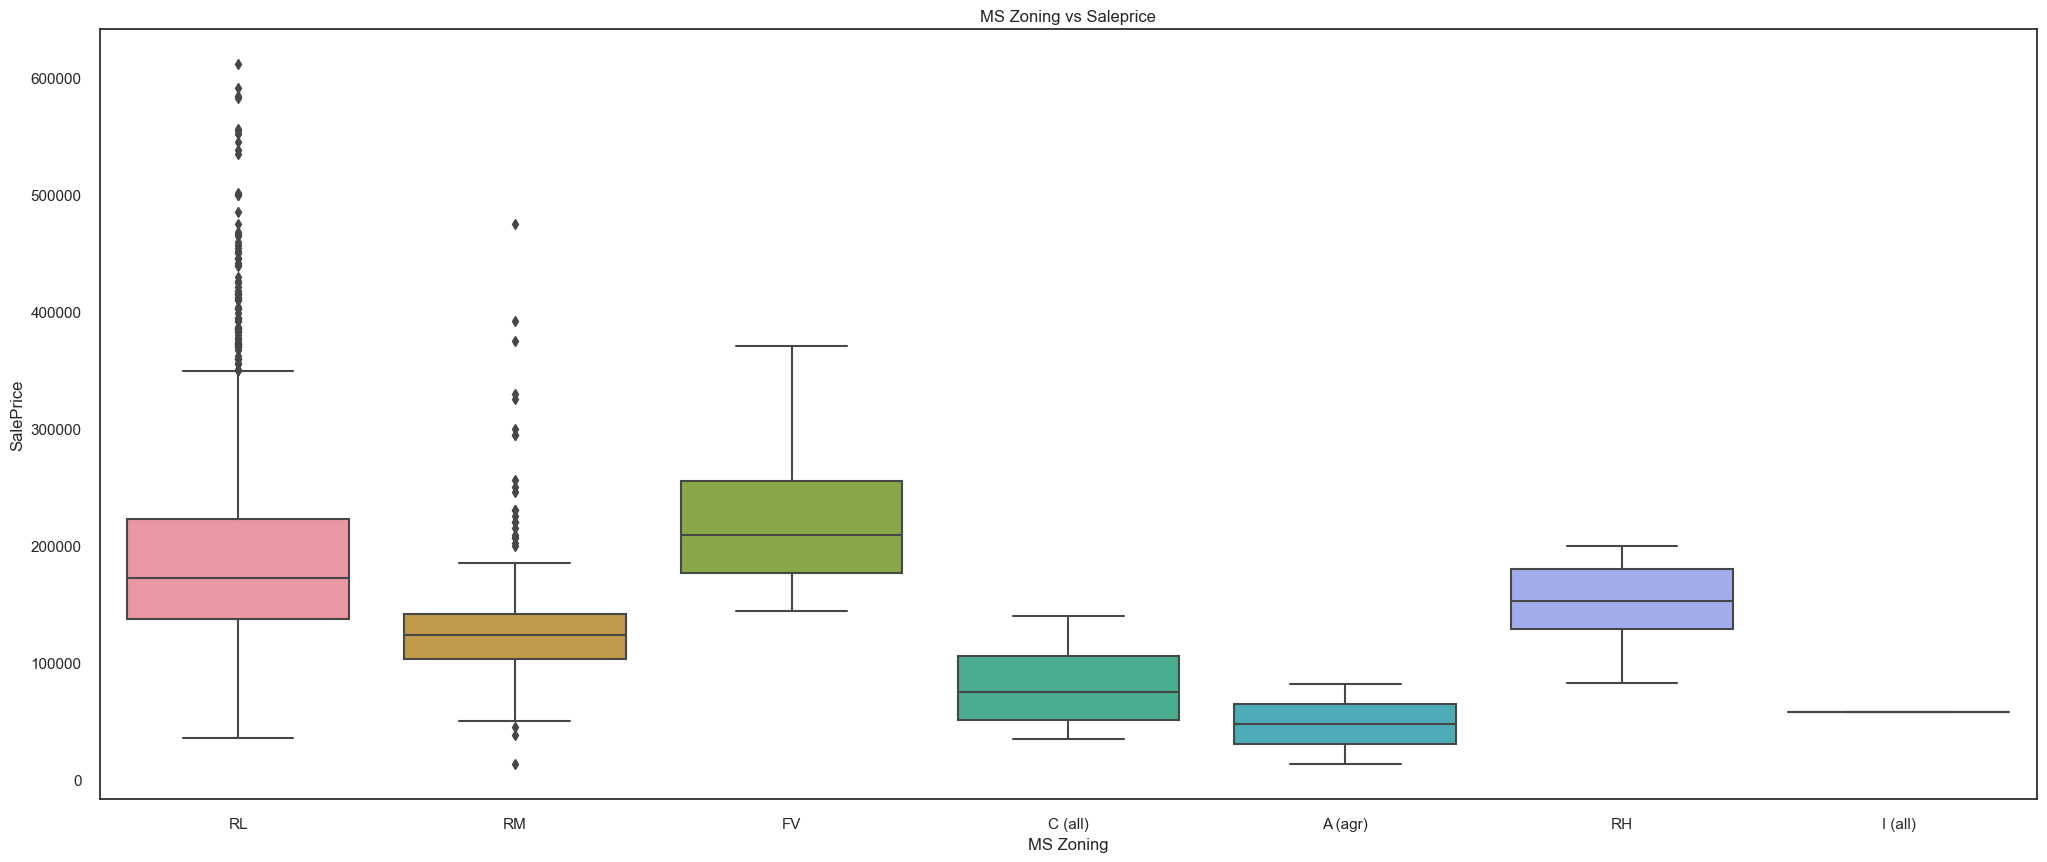

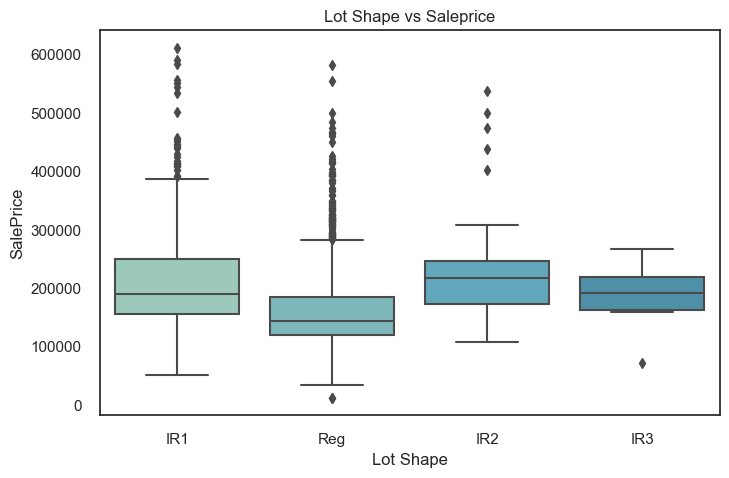

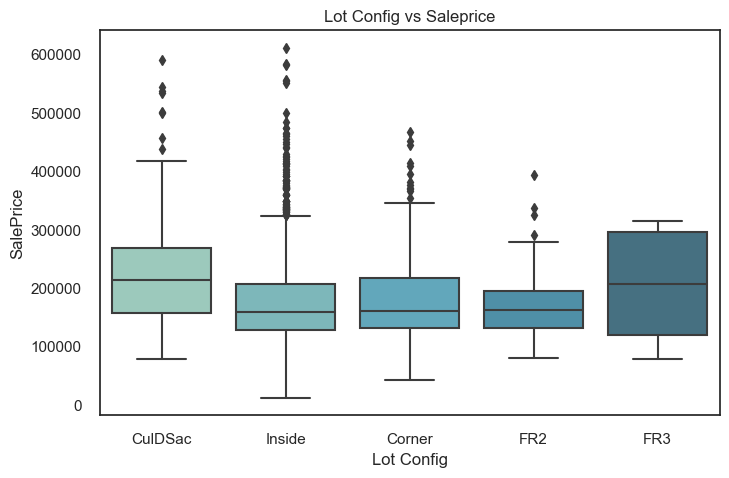

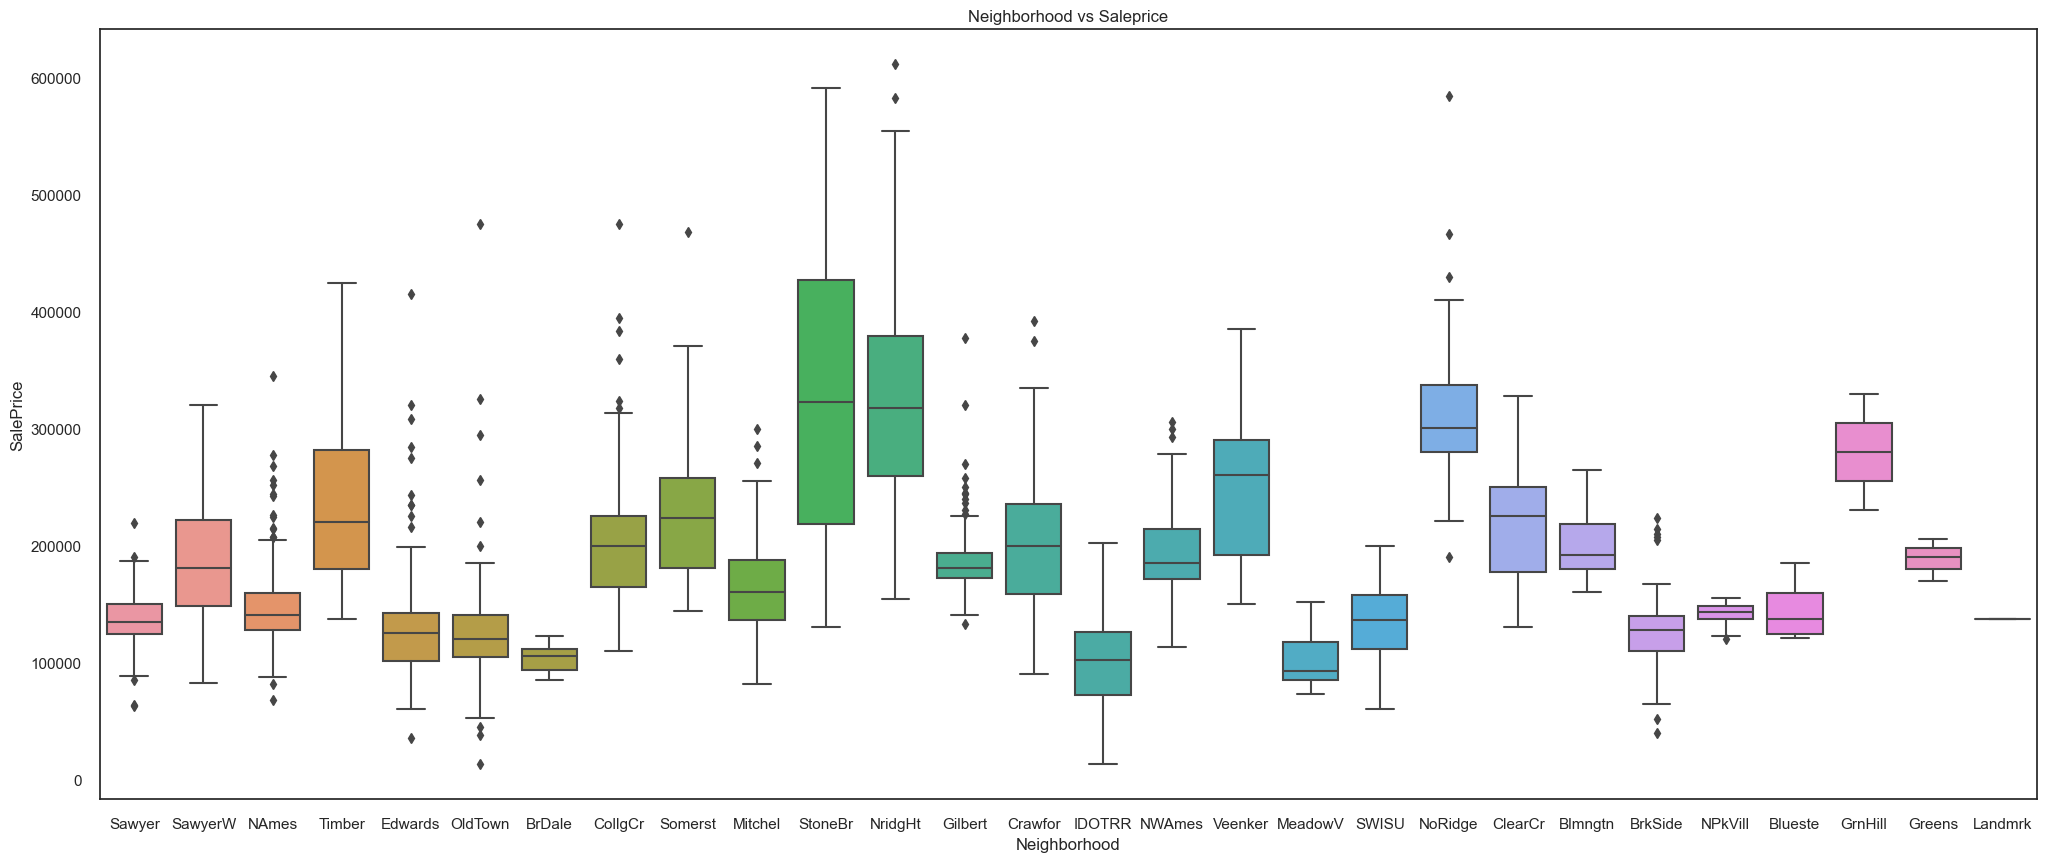

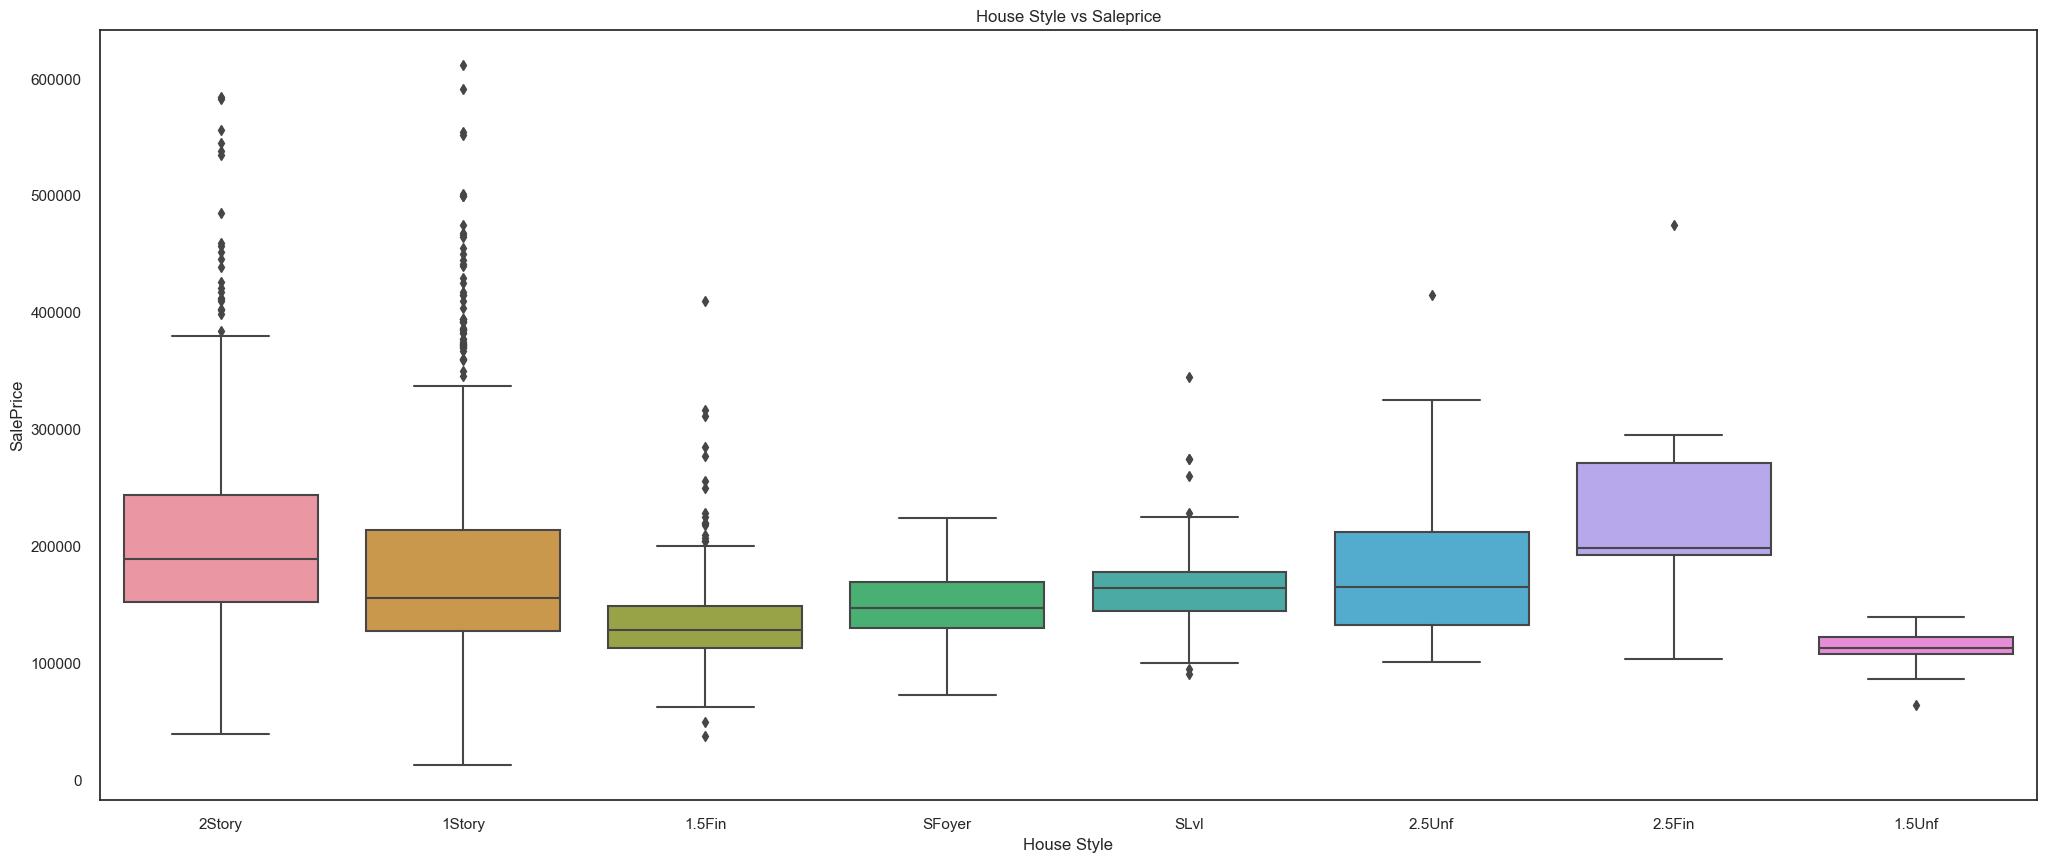

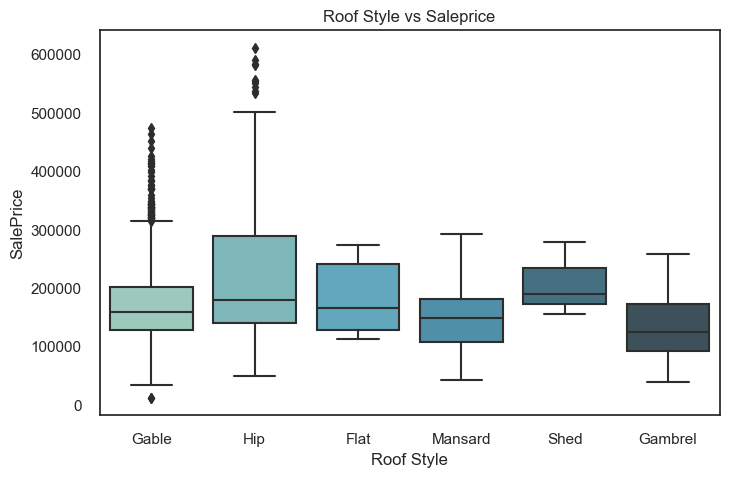

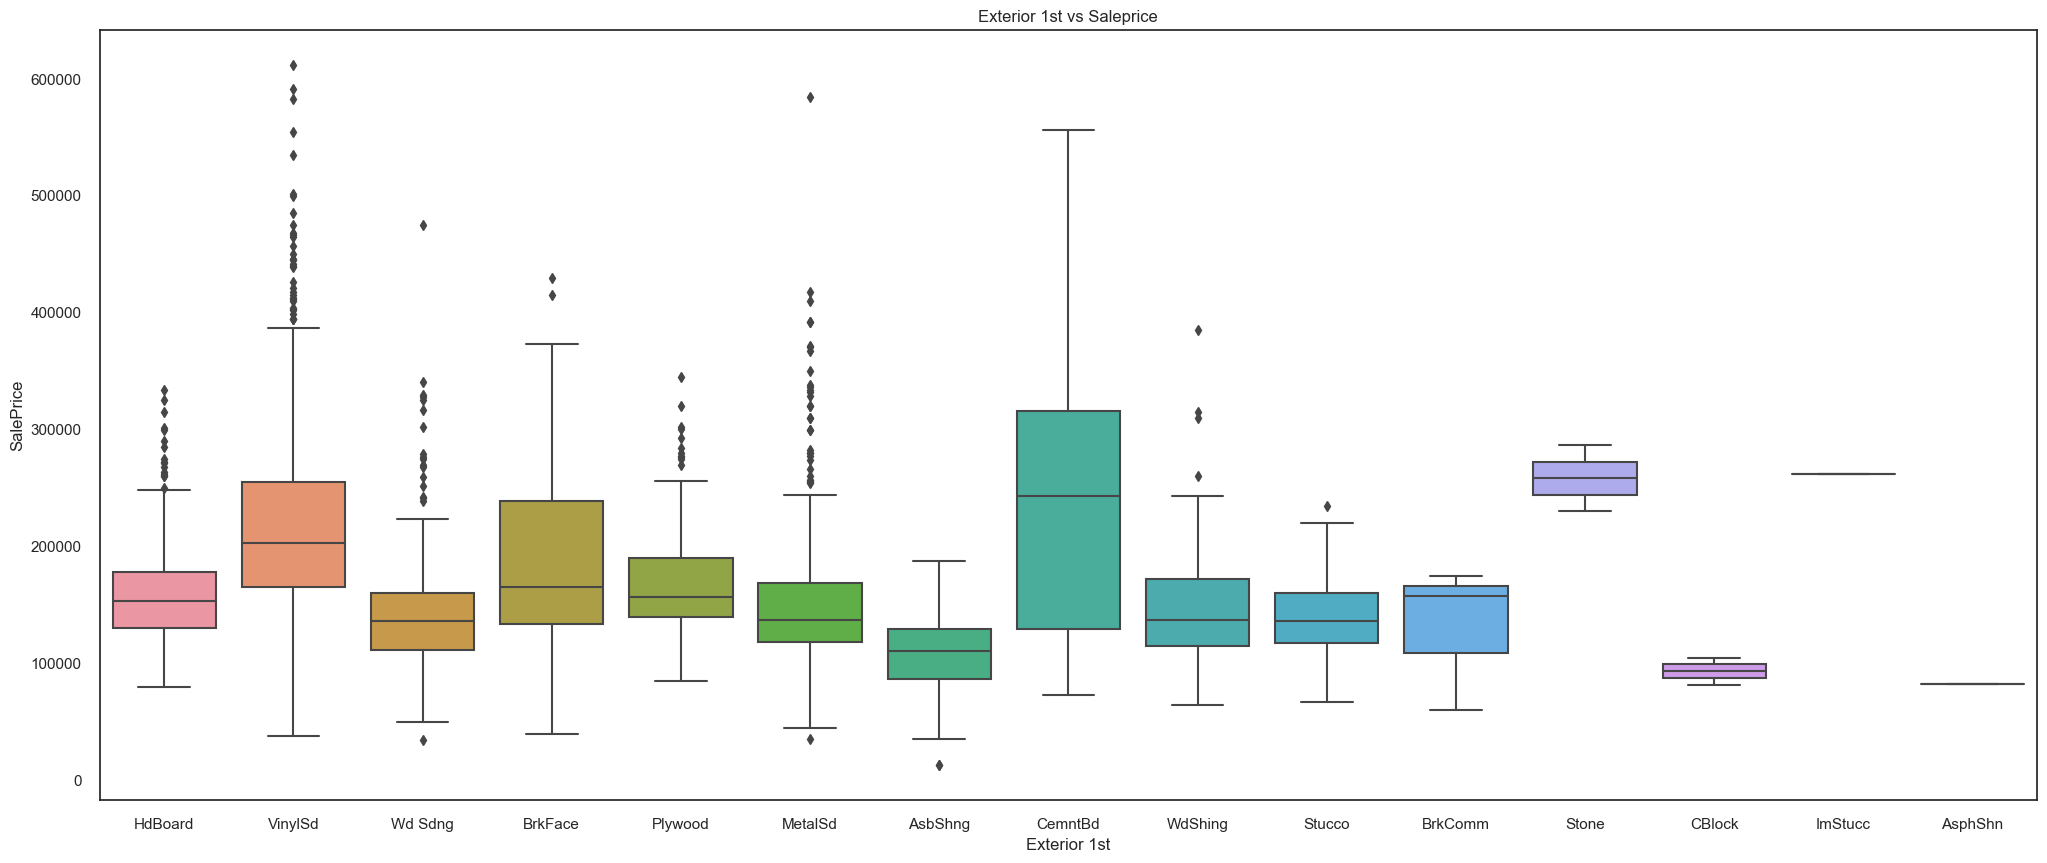

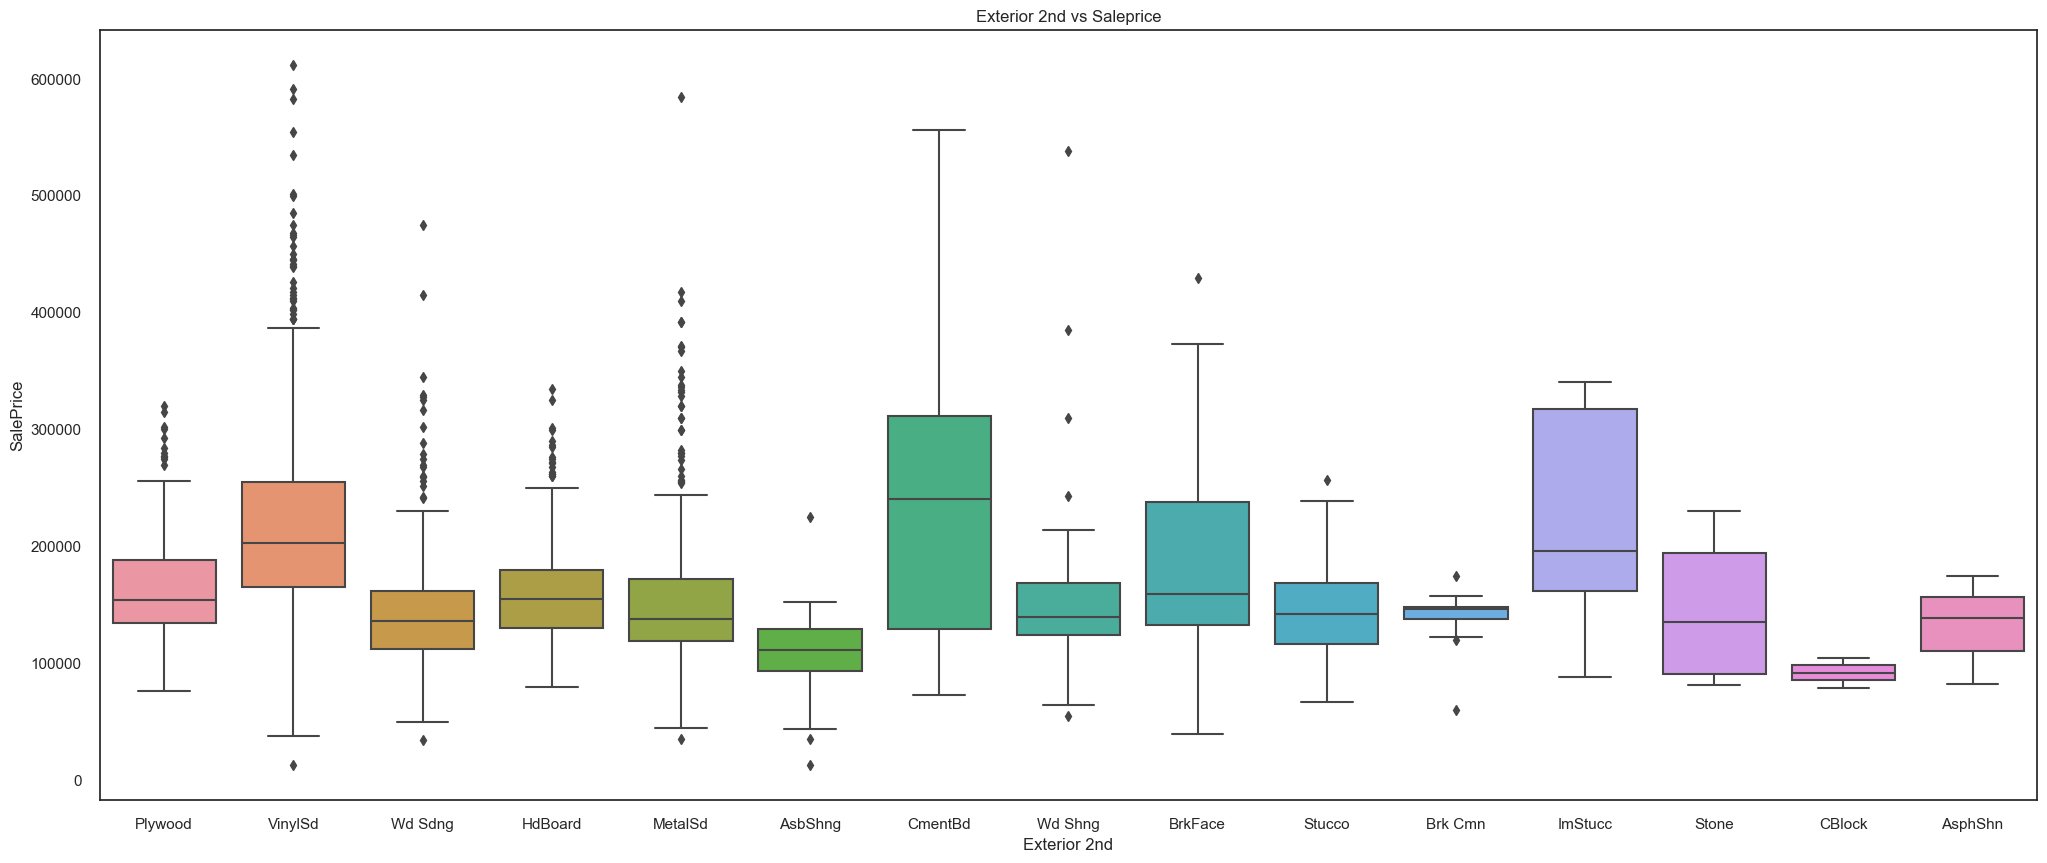

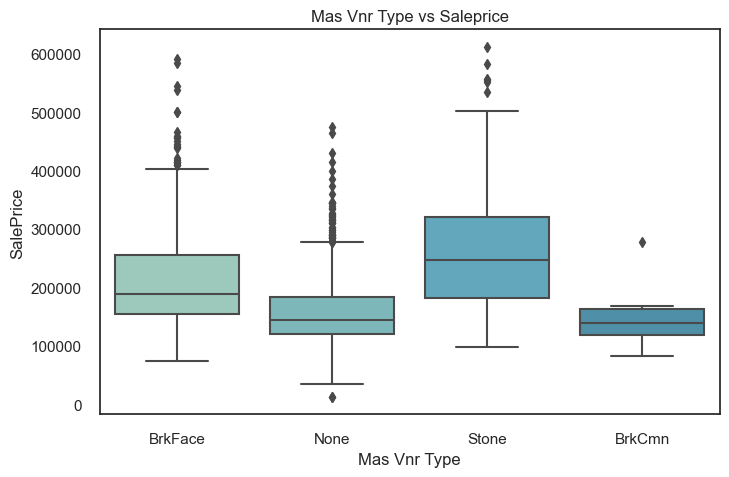

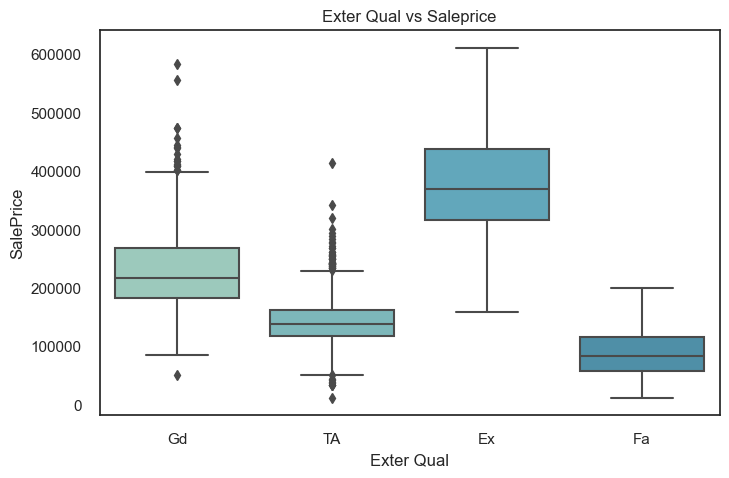

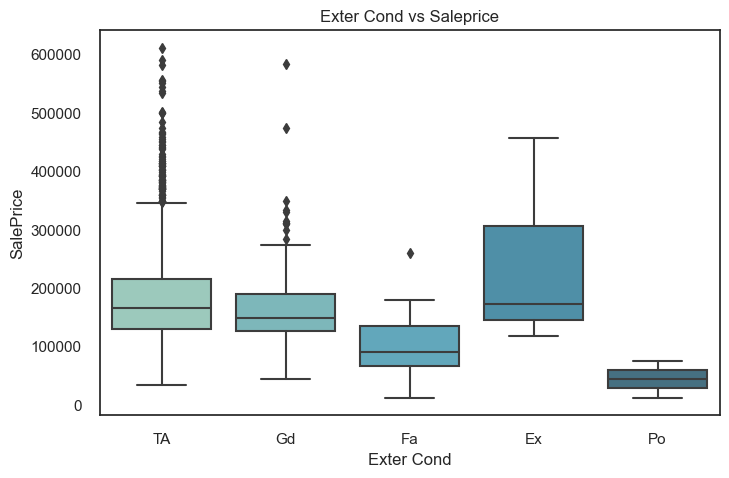

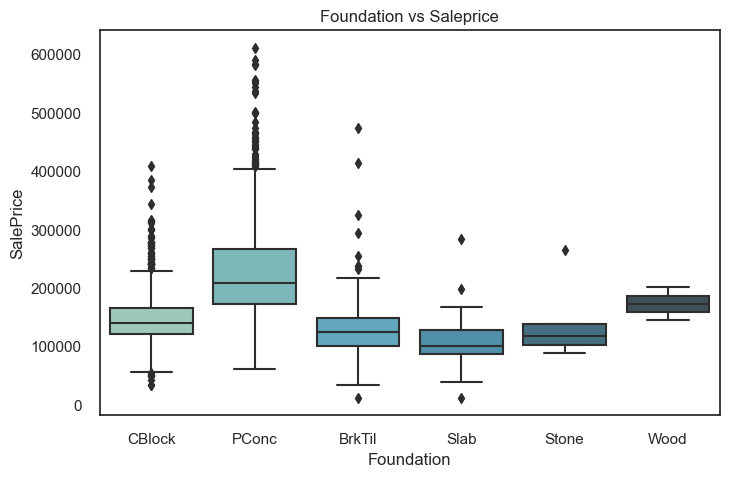

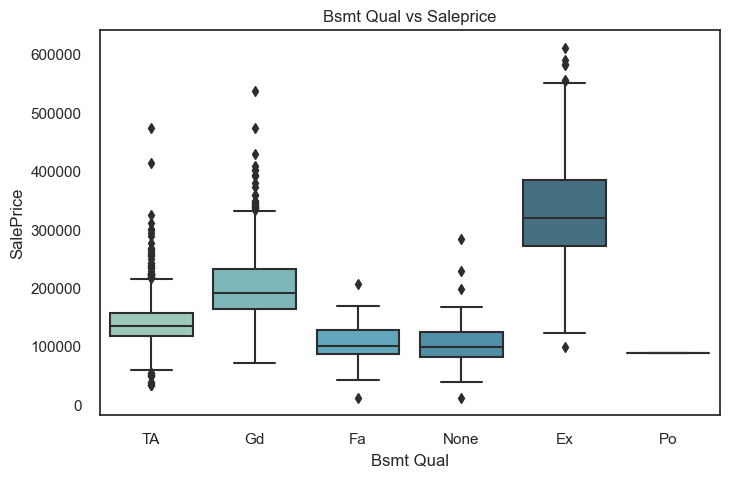

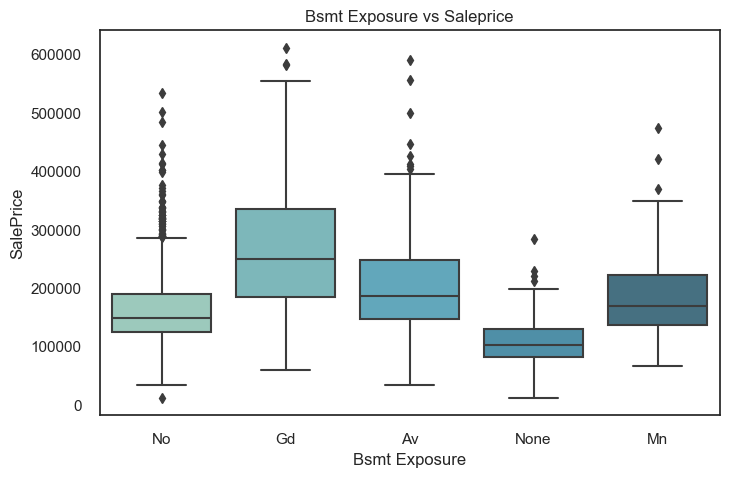

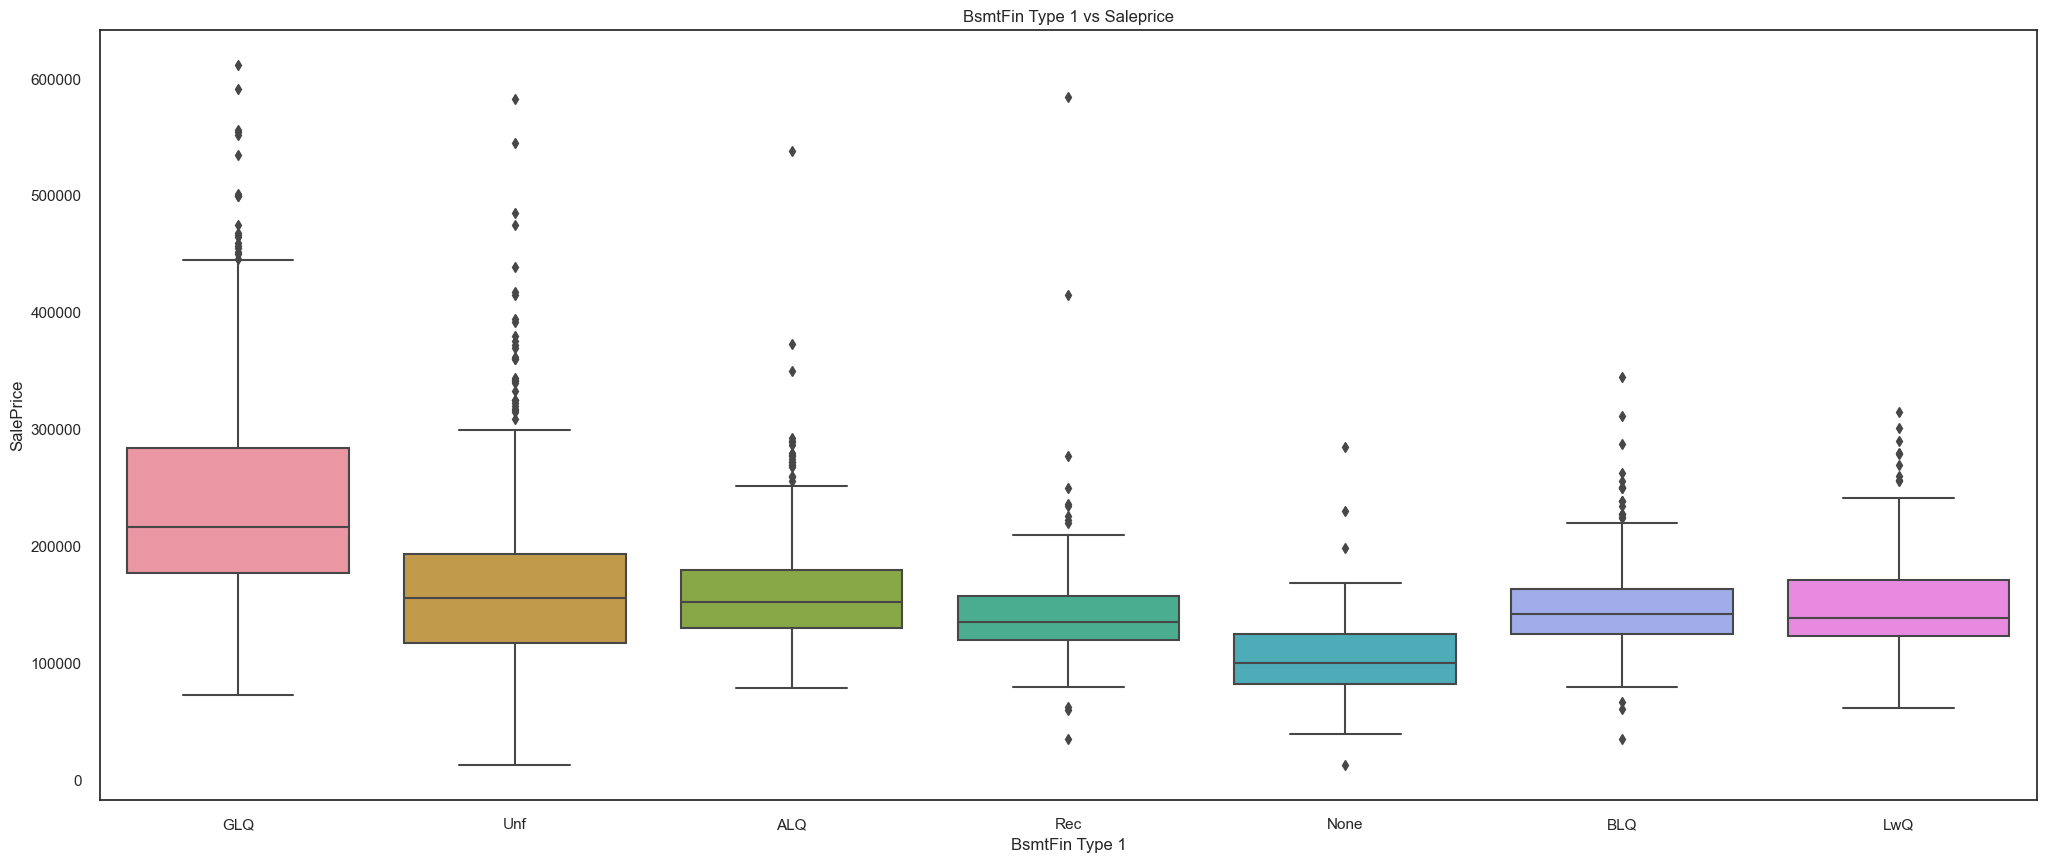

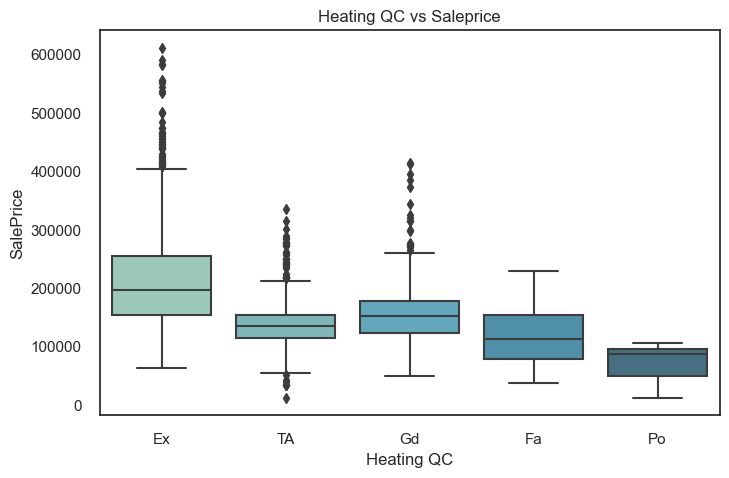

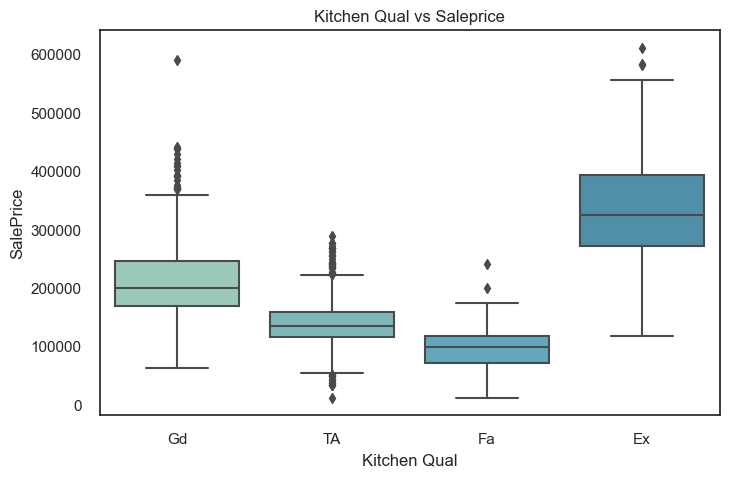

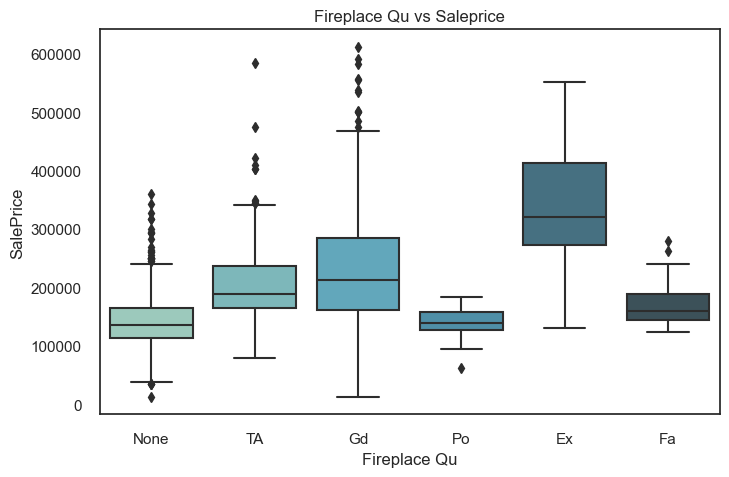

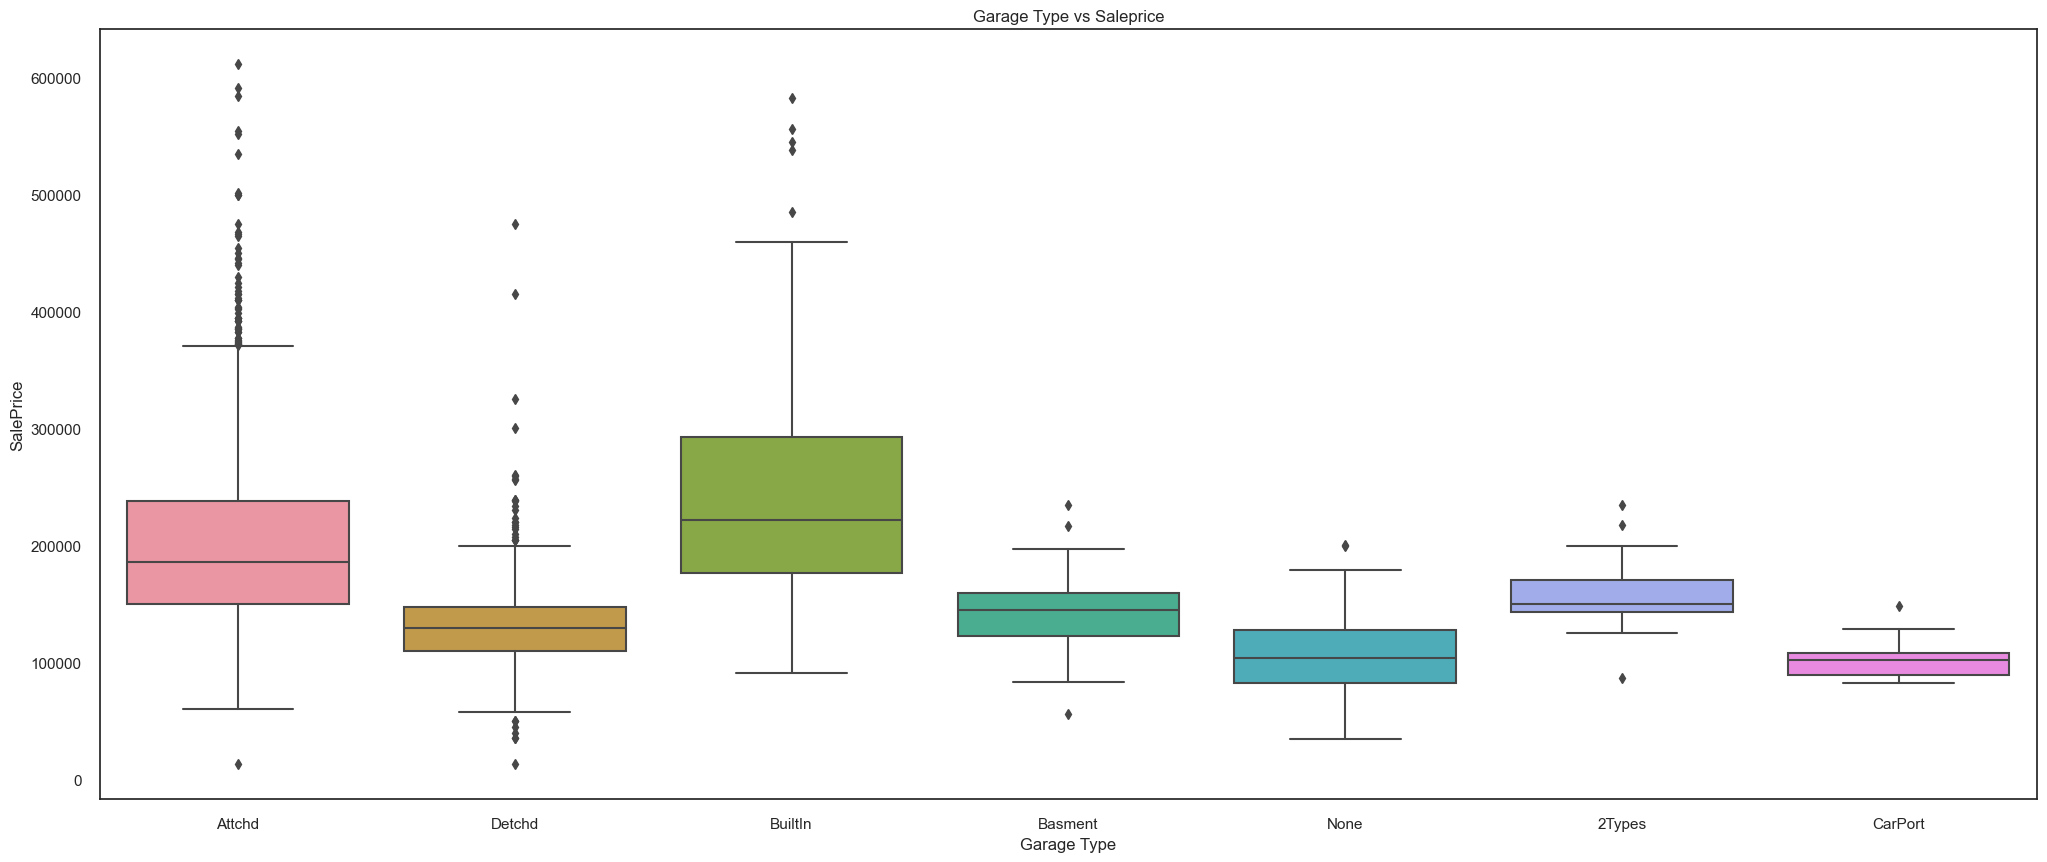

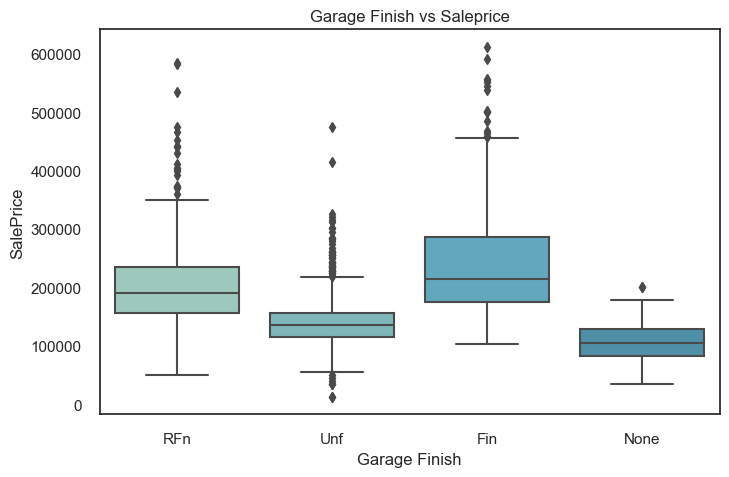

In [16]:
boxplot(train_cat)

- Based on the boxplots above, I will be dropping several variables as there seems to be very little variance, which may not significantly affect our model: PID, Lot Shape, Lot Config, House Style, Roof Style, Heating QC, BsmtFin Type 1.

In [17]:
# drop variables due to small variance

train_data.drop(['PID', 'Lot Shape', 'Lot Config', 'House Style', 'Roof Style', 'Heating QC', 'BsmtFin Type 1'], axis=1, inplace= True)
test_data.drop(['PID', 'Lot Shape', 'Lot Config', 'House Style', 'Roof Style', 'Heating QC', 'BsmtFin Type 1'], axis=1, inplace= True)


## Encoding of categorical variables

#### Mas Vnr Type

In [18]:
# since there is no clear order here, I will use the one hot encoding feature on these variables

train_data = pd.get_dummies(data=train_data, columns=['Mas Vnr Type']).drop('Mas Vnr Type_None', axis=1)
test_data = pd.get_dummies(data=test_data, columns=['Mas Vnr Type']).drop('Mas Vnr Type_None', axis=1)


#### Garage-related features

In [19]:
# one hot encoding since there is no clear order as well

train_data = pd.get_dummies(train_data, columns=['Garage Type'])
test_data = pd.get_dummies(test_data, columns=['Garage Type'])

# encode ordinal variables as integers

train_data['Garage Finish'] = train_data['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
test_data['Garage Finish'] = test_data['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

#### Fireplace

In [20]:
# encode ordinal variables as integers

train_data['Fireplace Qu'] = train_data['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test_data['Fireplace Qu'] = test_data['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

#### Basement quality and exposure

In [21]:
# according to the boxplot, basements of excellent quality (or height) tend to have much higher sales prices.

train_data['Bsmt Qual'] = train_data['Bsmt Qual'].map({'Ex':4,'Gd':2,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})
test_data['Bsmt Qual'] = test_data['Bsmt Qual'].map({'Ex':4,'Gd':2,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})

In [22]:
# as most basements have a condition of 0, I will be using this as the base 

train_data['Bsmt Exposure'] = train_data['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
test_data['Bsmt Exposure'] = test_data['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

#### External Quality and condition

In [23]:
# set the typical/average response variable at 0 as it is the mosts common response  

train_data['Exter Qual'] = train_data['Exter Qual'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})
test_data['Exter Qual'] = test_data['Exter Qual'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})

train_data['Exter Cond'] = train_data['Exter Cond'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})
test_data['Exter Cond'] = test_data['Exter Cond'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})

#### Kitchen Quality

In [24]:
# given that excellent quality kitchens have higher median sales prices, I added a slightly heavier weightage to the response variable 

train_data['Kitchen Qual'] = train_data['Kitchen Qual'].map({'Ex':4.5,'Gd':3,'TA':2,'Fa':1,'Po':0})
test_data['Kitchen Qual'] = test_data['Kitchen Qual'].map({'Ex':4.5,'Gd':3,'TA':2,'Fa':1,'Po':0})

### Encoding of Nominal Variables

We'll one hot encode the rest of our nominal features as they generally don't have any form of rank or order.

In [26]:
# creating a variable for the remaining features (train_data)
cat_features = [col for col in train_data.select_dtypes(include=['category', 'object']).columns]

In [27]:
# encoding the remaining features
train_data = pd.get_dummies(data=train_data, columns=cat_features)

In [28]:
# collect remaining features (test_data)
cat_features = [col for col in test_data.select_dtypes(include=['category', 'object']).columns]

In [29]:
# collect remaining features (test_data)
test_data = pd.get_dummies(data=test_data, columns=cat_features)

## Transform sale price to better fit the normal distribution

/Users/richelle-joychia/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

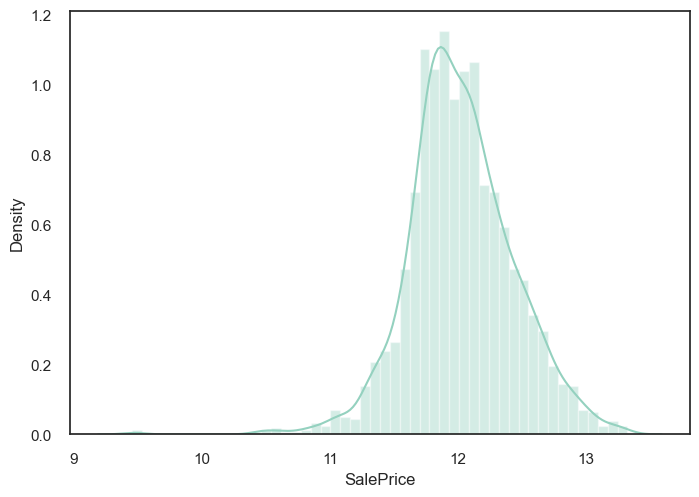

In [30]:
log_resp = np.log(train_data['SalePrice'])
sns.distplot(log_resp)

## Changing nominal to categorical feature

- As the subclasses for MS SubClass have diffferent characteristics, it is better to change it to a categorical variable instead

In [31]:
# encoding the feature (train_data)
train_data = pd.get_dummies(data=train_data, columns=['MS SubClass'])

In [32]:
# encoding the feature (test_data)
test_data = pd.get_dummies(data=test_data, columns=['MS SubClass'])

## Examine the correlation of features and sale price 

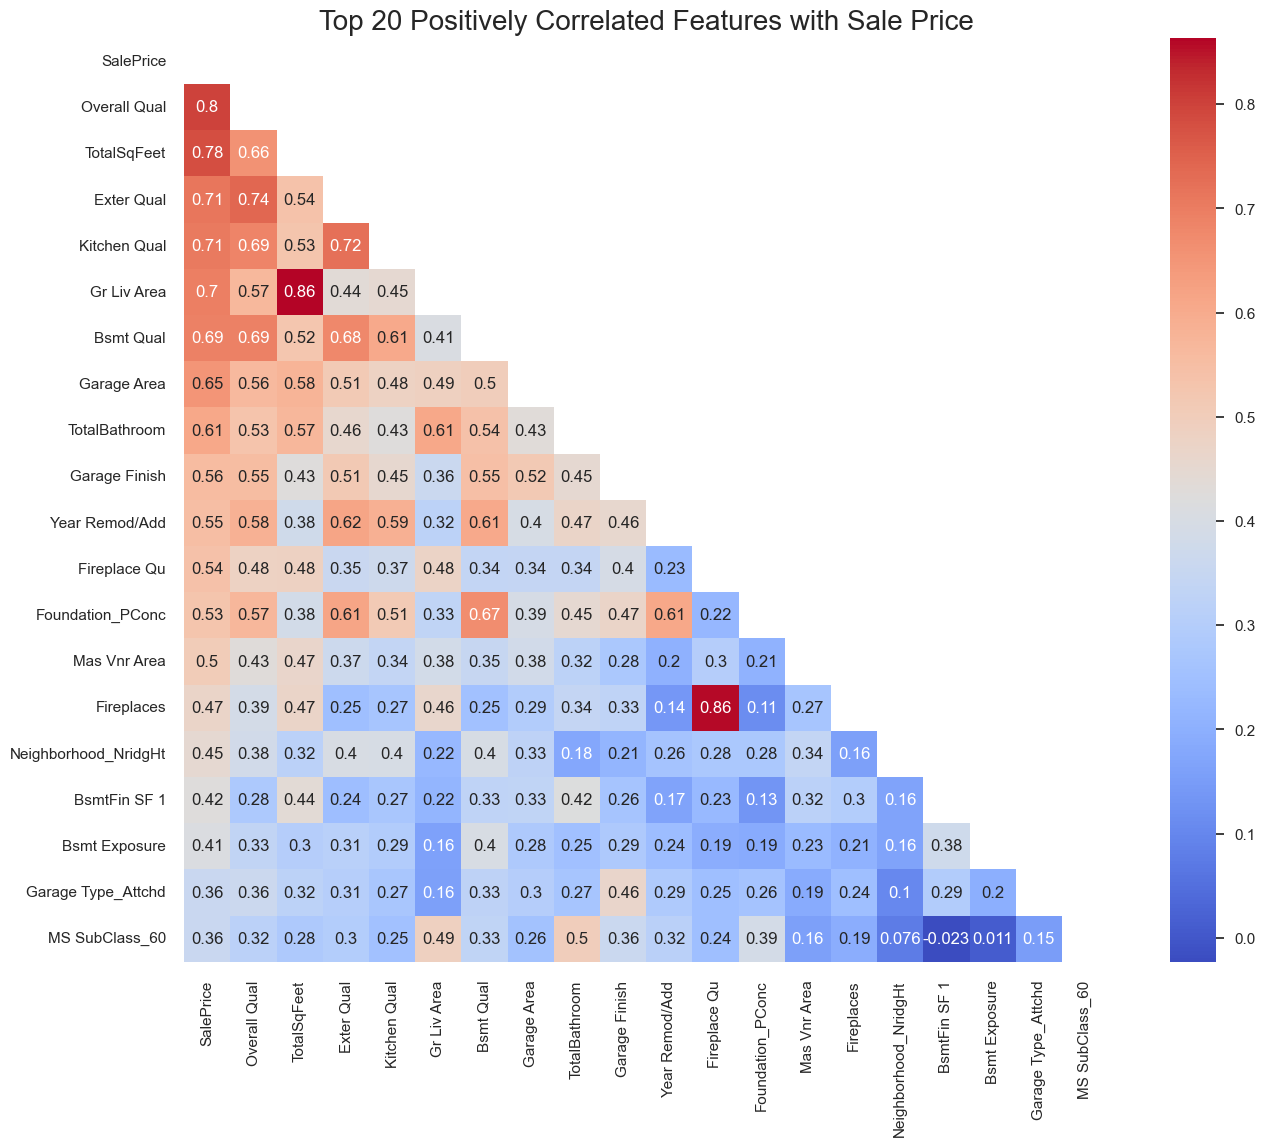

In [33]:
# Create mask for our top twenty positively correlated features
top_corr = train_data.corr()['SalePrice'].sort_values(ascending=False).head(20).index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(train_data[top_corr].corr(), dtype=bool))
ax = sns.heatmap(train_data[top_corr].corr(), cmap='coolwarm', mask=mask, square=True, annot=True)
plt.title('Top 20 Positively Correlated Features with Sale Price', fontsize=20);

There are 3 features that are highly correlated with each other, which may potentially affect the model. I will explore this further in Part 3: Preprocessing and feature engineering
 
- Overall Qual and Exter Qual (0.74)
- Gr Living Area and TotalSqFeet (0.86)
- Kitchen Qual and Exter Qual (0.72)

## Time to export the relevant datasets for the 3rd notebook where I will engage in preprocessing and feature engineering!

In [34]:
#Saves processed training data
train_data.to_csv('./data_clean_final.csv', index=False)

In [35]:
#save test data 
test_data.to_csv('./test_clean_final.csv', index=False)